# Decision Trees

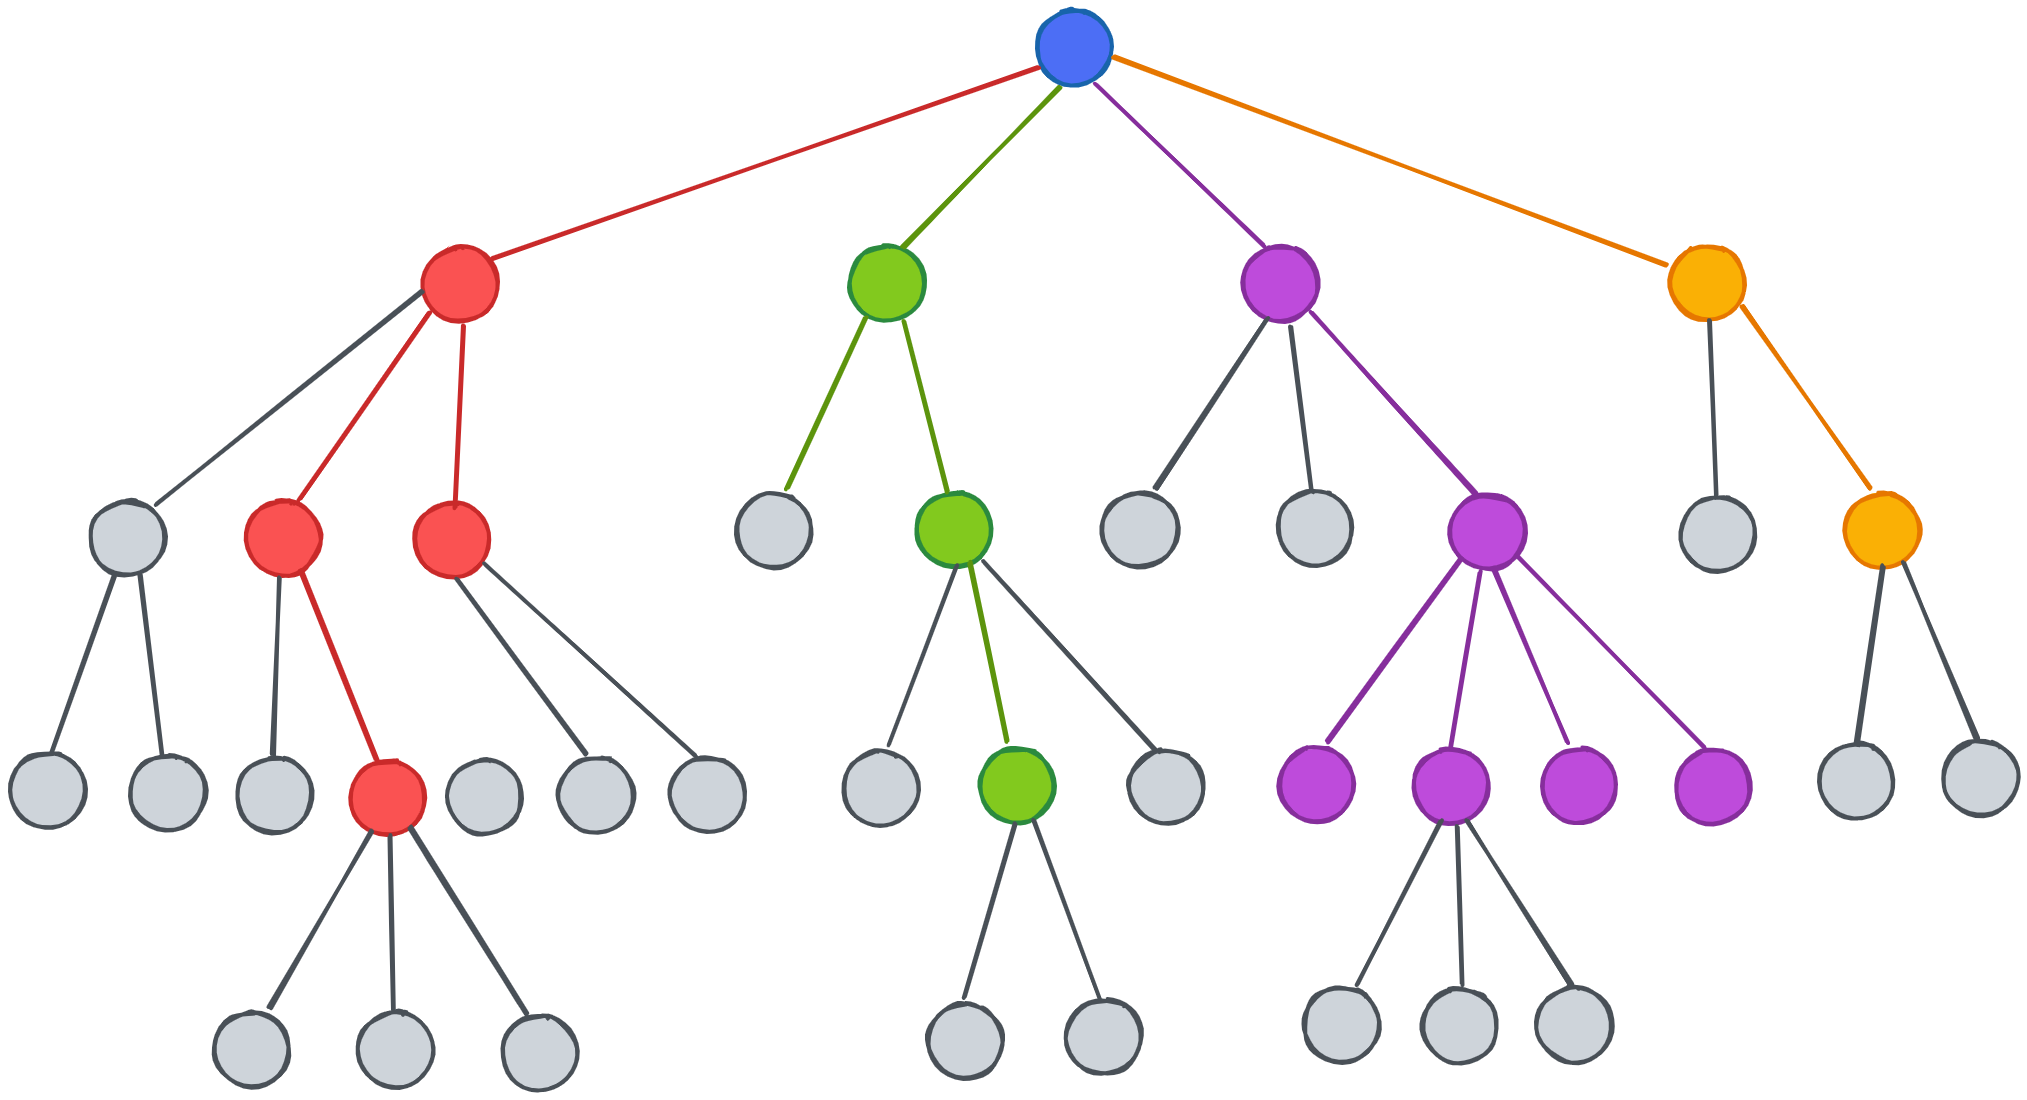

Decision trees are another form of nonparametric models, where the general idea is to perform classification or regression tasks by enforcing simple rules inferred from training data. 

Here are some advantages of decision trees:
* Simple to understand/interpret, unlike black box models (neural networks, etc.)
* No feature engineering or data preparation required
    * Able to handle missing values and outliers
* Can handle numerical and categorical data

Decision trees are a strong choice for predictive modeling due to these advantages. They are simple yet effective. 

However, it is important to note some of their disadvantages:
* Easy to overfit without setting a maximum depth, pruning, etc.
* Difficult to capture complex relationships between features and the target
* Can become unstable when there are small variations in data. 

There are three kinds of nodes in a decision trees:
* Root Node: Represents the entire dataset and is where the decision-making process begins. It contains a decision based on a feature that best splits the dataset into two or more subsets. The root node is the topmost node in the tree and has branches that connect to subsequent nodes.

* Decision Nodes: Decision points in the tree where a feature is evaluated. The dataset is split into subsets based on the value of that feature. Each decision node corresponds to a specific feature and a threshold value (for continuous features) or a category (for categorical features). 

* Leaf Nodes: The endpoints of the decision tree branches. They represent the final decision or prediction made by the model for a particular subset of the data. Each leaf node corresponds to a class label (in classification tasks) or a numerical value (in regression tasks) and contains the output of the decision-making process for the corresponding subset of data.

The actual decision tree will be built during the training process, and it will be used to predict the value/class of testing data. 

Now, we can run a decision tree on our Auto-MPG data!

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


auto = pd.read_csv("/Users/kritinshanmugam/Downloads/auto-mpg.csv")
auto = auto[auto['horsepower'] != '?']
auto.dropna(inplace=True)
features = ['horsepower', 'weight', 'displacement', 'cylinders', 'acceleration']
X = auto[features].astype('float64')
y = auto['mpg'].values

X = (X - X.mean()) / X.std()

X = X.values

y = np.where(auto['mpg'] < 23, 0, 1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Classification

In the following cells, we will run a classification decision tree on our data!

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text

d_tree = DecisionTreeClassifier(max_depth=15, random_state=31)
d_tree.fit(x_train, y_train)


# We can visualize our tree and see its rules using these functions. 
tree_rules = export_text(d_tree, feature_names = features)
print(tree_rules, "\n")

|--- weight <= -0.25
|   |--- weight <= -0.82
|   |   |--- cylinders <= -1.16
|   |   |   |--- class: 0
|   |   |--- cylinders >  -1.16
|   |   |   |--- class: 1
|   |--- weight >  -0.82
|   |   |--- cylinders <= -0.28
|   |   |   |--- weight <= -0.44
|   |   |   |   |--- acceleration <= 0.80
|   |   |   |   |   |--- weight <= -0.47
|   |   |   |   |   |   |--- displacement <= -1.06
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- displacement >  -1.06
|   |   |   |   |   |   |   |--- horsepower <= -0.49
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- horsepower >  -0.49
|   |   |   |   |   |   |   |   |--- acceleration <= 0.08
|   |   |   |   |   |   |   |   |   |--- weight <= -0.55
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- weight >  -0.55
|   |   |   |   |   |   |   |   |   |   |--- weight <= -0.52
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   

If we want a more colorful plot with clear paths, we can use the function plot_tree function. 

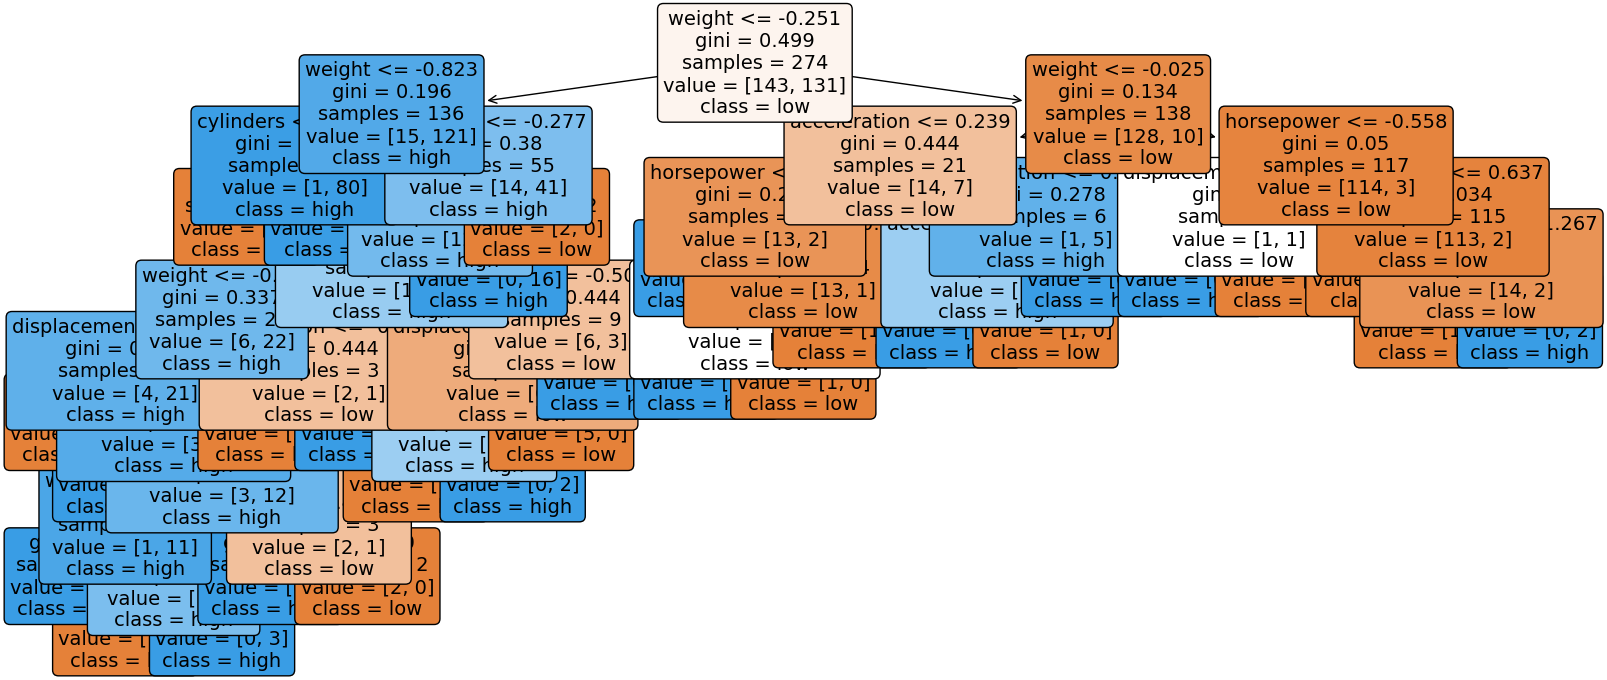

In [9]:
plt.figure(figsize=(20, 8))
tree_plot = plot_tree(d_tree, feature_names = features, class_names = ["low", "high"], rounded = True, filled = True, fontsize=14)

We can determine the accuracy of our decision tree by creating a confusion matrix. 

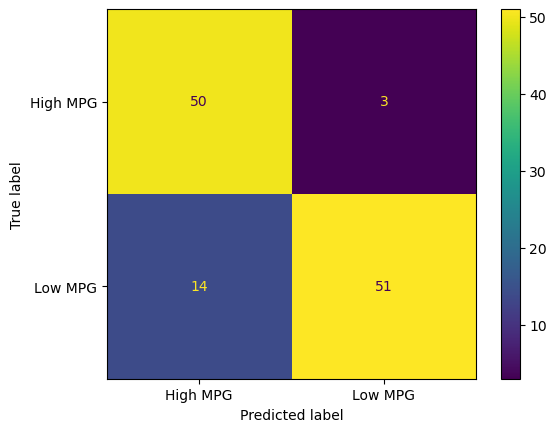

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

predictions = d_tree.predict(x_test)

confusion = confusion_matrix(y_test, predictions)

display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['High MPG', 'Low MPG'])

display.plot()

plt.show()

Analysis: The confusion matrix is a simple way to view a basic level of accuracy with our classfication model. We can see the number of accurate predictions, as well as the number of false positives and false negatives. In terms of our model, it appears that there are 14 false postives, where the model believed a low-efficiency car would have a high MPG. The number of false negatives is pretty low, on the other hand. 

Overall, a confusion matrix is a great way to analyze a model's accuracy. 

## Regression 

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Need to revert y back to regression data form. 
y = auto['mpg'].values

decision_regressor = DecisionTreeRegressor(max_depth=3)

decision_regressor.fit(x_train, y_train)

reg_predictions = decision_regressor.predict(x_test)

mse = mean_squared_error(y_test, reg_predictions)

print(mse)



0.12089757177196055


Nice, we got a very low MSE! Our decision tree works really well. 


### What is the effect of the max_depth parameter?

Now, we can test the effect of the max_depth parameter on the accuracy of a decision tree. Generally, a lower depth helps prevent the decision tree from overfitting on the training data. However, the actual number can vary depending on the dataset itself. We can perform a make-shift grid search by calculating the mean-squared error of a decision tree with one of several increasing depth values. 

In [12]:
depths = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
results = {}
for depth in depths:
    reg = DecisionTreeRegressor(max_depth=depth)
    reg.fit(x_train, y_train)
    preds = reg.predict(x_test)
    mse = mean_squared_error(y_test, preds)
    results[depth] = mse

results

{1: 0.13634354226554563,
 3: 0.1289766678171583,
 5: 0.14748837388062574,
 7: 0.1494995243860256,
 9: 0.1673728813559322,
 11: 0.15254237288135594,
 13: 0.17796610169491525,
 15: 0.17796610169491525,
 17: 0.1864406779661017,
 19: 0.15254237288135594}

For our auto-mpg dataset, it appears that the highest accuracy tree is achieved with a max-depth value of 3. We can also see that the MSE increases for any number below or above those values, until it reaches depth 19. So, it is definitely important to tune the decision tree's depth to the dataset. The value will not fit all datasets. 


## Conclusion

Decision trees are intuitive, simple nonparametrics models that can be used without much data preparation or feature engineering. In this notebook, we used Sci-kit learn to test a classification tree and regression tree on our Auto-MPG dataset. We saw its accurate performance for both tasks, through confusion matrices and MSE scores. We also showed the importance of preventing overfitting by tuning the max_depth parameter for the tree. The parameter made a clear impact on the tree's accuracy, represented by its Mean Squared Error. 
